<a href="https://colab.research.google.com/github/luciojosep/Portfolio/blob/main/Clase_Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de datos**
# **Clase Práctica 1**
# *Lic. Lucio José Pantazis*



## Google Collaboratory

Es una plataforma que se utiliza a partir de una cuenta de Google para poder programar en Python desde la nube.

Los archivos guardados se llaman "notebooks" y tienen formato ".ipynb" (IPYthon NoteBook). Se genera un nuevo archivo a partir del Google Drive, usando la opción de de "Google Collaboratory".

Permite agregar bloques de texto y código de Python de forma intercalada. Por lo que es muy útil para hacer informes que requieran cálculos en Python. El código se incluye en lo que se llaman "celdas".

In [ ]:
# Esto es una celda, en este fragmento puedo realizar cálculos y definir variables
# Ejemplo
x=4
y=3
x+y

In [ ]:
x-y

## Pandas

Python tiene "librerías" con funciones y tipos de datos específicos para determinados fines. En el caso de trabajar con bases de datos, la librería estándard se llama `pandas` y, por convención, se importa del siguiente modo:

In [ ]:
import pandas as pd

Esta librería tiene un tipo de variable específico para trabajar con bases de datos que se llama `DataFrame`. La mayor ventaja de este tipo de datos es que permite almacenar distintos tipos de datos en la misma estructura. Es decir, puede albergar variables tanto cuantitativas como cualitativas.

Hay estructuras de datos que requiere que todos los elementos de la estructura tengan el mismo tipo de datos, eso permite ahorrar el uso de memoria pero perder versatilidad.

Por ejemplo, vamos a armar una base de datos con una variable cuantitativa y una cualitativa:

In [ ]:
df=pd.DataFrame({"X":[1,2,3]*100,"y":["A","B"]*150})
print(df)

     X  y
0    1  A
1    2  B
2    3  A
3    1  B
4    2  A
..  .. ..
295  2  B
296  3  A
297  1  B
298  2  A
299  3  B

[300 rows x 2 columns]


Para no mostrar todos los datos y sólo ver la estructura, se puede utilizar la función "head" que permite ver las primeras filas de la base:

In [ ]:
df.head()

,X,y
0,1,A
1,2,B
2,3,A
3,1,B
4,2,A


Además, podemos ver que efectivamente una variable es cuantitativa y otra es cualitativa con la función "info":

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       300 non-null    int64 
 1   y       300 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


## Web Scraping

Web Scraping consta de técnicas para bajar directamente bases de datos desde la web. Para distintas páginas se pueden aplicar distintas técnicas.



### UCI

[UCI](https://archive.ics.uci.edu/datasets) es un repositorio de datos para aplicar algoritmos de Machine Learning.

A continuación vamos a descargar directamente una base de datos sobre salarios desde la [página](https://archive.ics.uci.edu/dataset/2/adult) correspondiente.

Si se accede a la página, se puede bajar un link de descarga:

In [ ]:
url="https://archive.ics.uci.edu/static/public/2/adult.zip"

#### Carga de datos

Para bajar la base de datos directamente, se puede usar un paquete que se llama `wget`, que no siempre está disponible y que por eso conviene instalarlo previamente.

In [ ]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e71e66fbe1aa68e1cb507b1120fead87ad70b3d837ab81aa51b099531b31af8d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Con este paquete, se puede bajar el archivo .zip con los datos desde el url.

In [ ]:
wget.download(url, "archivo.zip")

'archivo.zip'

Este archivo .zip descargado aparece en la carpeta de contenido a la izquierda.

Luego hay que extraer la base de datos del zip, por eso, se utilizan los siguientes comandos:

In [ ]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

Accedemos al contenido de archivos y vemos que el archivo se denomina `adult.data`. Para leer esta base podemos usar el comando `read_csv` del paquete `pandas`:

In [ ]:
df=pd.read_csv("/content/adult.data")

#### Inspección de la base

Vemos que los datos no quedan bien cargados con el método `.head()`:

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Vemos que las columnas parecen ser valores de la base de datos que no deberían considerarse como nombres. Por lo tanto, se puede agregar que los datos no tienen cabecera, con el argumento `header=None`:

In [ ]:
df=pd.read_csv("/content/adult.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Falta nombrar las variables, buscando los nombres de las variables en el link estos se pueden agregar como nombres de las columnas:

In [ ]:
vars=["age","workclass","fnlwgt","education","education-num",
      "marital-status","occupation","relationship","race","sex",
      "capital-gain","capital-loss","hours-per-week","native-country","class"]
df.columns=vars
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Con la base bien procesada, podemos inspeccionar sus variables con lo visto anteriormente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Además de ver que estén bien cargadas, se pueden inspeccionar características de las variables. Una buena forma de inspeccionar variables cualitativas es con la función `value_counts`:

In [ ]:
# Análisis variables cualitativas
df["class"].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

Para variables cuantitativas, algunos valores importantes para resumir los datos se puede hacer con el método `describe`

In [ ]:
# Análisis variables cuantitativas
df["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

### Kaggle

Otro lugar de donde se pueden sacar datos, se llama [Kaggle](https://www.kaggle.com/). Para extraer los datos primero se requiere un token correspondiente a una API (Application Protocol Interface), que permite al collaborate acceder a Kaggle.

Para lograr este vínculo, es necesario estar registrado en kaggle. Accediendo al perfil:
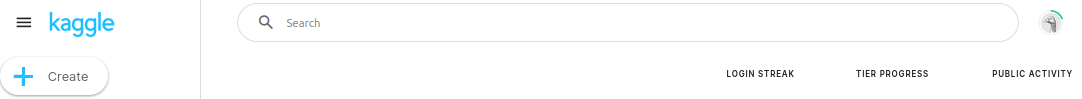

se puede ir a los ajustes:

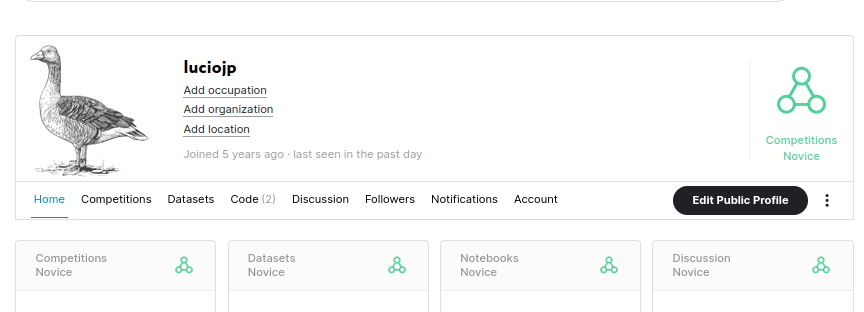

y generar el token para el usuario:

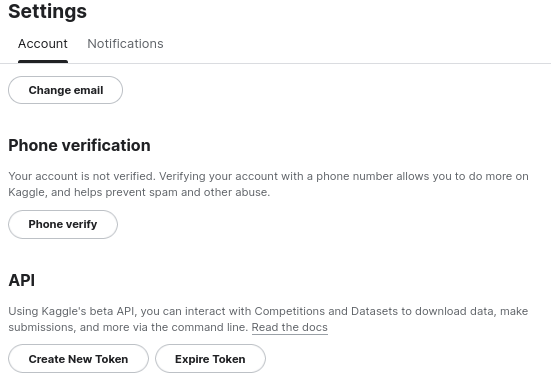

Este token que se baja a nuestro disco, se puede cargar "suelto" en nuestro google drive. Como el archivo tiene extensión `.json`, y está cargado al drive, se necesitan los siguientes paquetes:

In [ ]:
import json
from google.colab import drive

Para acceder al token, se utilizan los siguientes códigos:

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


Una vez que accedemos al token, podemos bajar directamente la base de por ejemplo, el [reporte mundial de la felicidad](https://www.kaggle.com/datasets/unsdsn/world-happiness):

In [ ]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 2.91MB/s]


Ahora que se baja el zip, extraemos de la base del mismo modo:

In [ ]:
os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

Una vez extraída la base, leemos la base de datos al igual que antes:

In [ ]:
# Cargamos la base
df = pd.read_csv('/content/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Algoritmos de clasificación

Los algoritmos de clasificación buscan identificar patrones que se asocien con clases de una variable categórica.

Esta variable debe tener un interés específico para la aplicación, ya que será lo que más se quiere identificar a partir de otras variables. Esta variable se suele llamar variable de respuesta, variable de salida, etiqueta, dependiendo de la disciplina. Suele notarse con la letra `y`.

Además, hay variables que sospechamos que pueden tener influencia sobre dicha variable de respuesta, que son sobre las cuales el algoritmo identifica patrones. Estas variables se denominan variables explicativas, variables predictoras, covariables, variables de entrada, instancias, dependiendo del área de aplicación. Suelen notarse con la letra `X`.


Por ejemplo, en la base de salarios descripta anteriormente, puede ser de interés predecir cómo se clasifica el salario de una persona considerando las otras variables de la base.

In [ ]:
# Elijo las covariables (para LDA y QDA deben ser numéricas)
covs=["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
# Selecciono de la base, las covariables
X=df[covs].copy();print(X.head())
# La variable de respuesta es "class"
y=df["class"].copy();print(y.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40
0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object


## Bases de entrenamiento y testeo

Decimos que los algoritmos de machine learning "aprenden" estos patrones de los datos. Para buscar estos patrones sin sesgar demasiado los resultados, la base suele dividirse en dos partes:

* una para identificar los patrones (base de entrenamiento)

* otra para testear si los patrones obtenidos se replican en otras observaciones (base de testeo)

En general para la división suele elegirse entre un 70 y 80% de los datos para la base de entrenamiento, y el porcentaje restante es para la variable de testeo.

Además, esta selección es completamente al azar, en el sentido de que primero los datos se "mezclan" y luego se elige el porcentaje. Esto busca eliminar sesgos que pueden darse por la disposición inicial en el que están ordenados los datos.

Para hacer esta división en Python, se utiliza el comando `train_test_split` del paquete Sci-kit learn (abreviado `sklearn`), paquete standard para algoritmos de machine learning:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

En este caso, se elige 20% para la base de testeo con el argumento `test_size`. Por otro lado, el argumento `random_state` fija un punto de inicio para la aleatorización de forma que otra persona pueda reproducir el código obteniendo los **mismos** resultados. Ayuda a que otras personas puedan verificar los algoritmos.

El resultado da 4 datos, donde:

* X_train son las covariables de la base de entrenamiento.

* X_test son las covariables de la base de testeo.

* y_train son las respuestas de la base de entrenamiento.

* y_test son las respuestas de la base de testeo.

Veamos que efectivamente son el 80% y 20% de los datos, respectivamente:

In [ ]:
print("Cantidad de filas totales: "+str(X.shape[0]))
print("Cantidad de filas entrenamiento: "+str(X_train.shape[0]))
print("Cantidad de filas testeo: "+str(X_test.shape[0]))
print("0.8*32561= "+str(0.8*32561))
print("0.2*32561= "+str(0.2*32561))
print("26048+6513= "+str(26048+6513))

Cantidad de filas totales: 32561
Cantidad de filas entrenamiento: 26048
Cantidad de filas testeo: 6513
0.8*32561= 26048.800000000003
0.2*32561= 6512.200000000001
26048+6513= 32561


## Algoritmo: Linear Discriminant Analysis (LDA)


Para aplicar el algoritmo LDA, también utilizamos el paquete `sklearn`:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Inicializo el algoritmo
LDA = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Evaluación de los resultados

Habiendo corrido la función `fit`, se buscaron los patrones entre las variables de `X_train` y las respuestas `y_train`.

Con estos patrones identificados, el algoritmo está listo para predecir la clase de nuevas observaciones de las covariables. Para lograr estas predicciones se usa la función `predict`. Vamos a ver cómo funciona para algunas nuevas instancias.

In [ ]:
print("Covariables:")
print(X_test.head())
print("Clases Predichas:")
print(LDA.predict(X_test.head()))
print("Clases Reales:")
print(y_test.head())

Covariables:
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
14160   27  160178             10             0             0              38
27048   45   50567              9             0             0              40
28868   29  185908             13             0             0              55
5667    30  190040             13             0             0              40
7827    29  189346             10          2202             0              50
Clases Predichas:
[' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K']
Clases Reales:
14160     <=50K
27048     <=50K
28868      >50K
5667      <=50K
7827      <=50K
Name: class, dtype: object


Utilizamos esta función para ver qué respuestas elige el algoritmo para tanto los datos de entrenamiento como los datos de testeo, para ver cómo coinciden las predicciones con las respuestas reales. Es decir, las respuestas reales (`y_train`, `y_test`), deberían ser similares a las respuestas predichas (`LDA_train_pred`, `LDA_test_pred`).

In [ ]:
# Predicciones para la base de entrenamiento
LDA_train_pred=LDA.predict(X_train)
# Predicciones para la base de testeo
LDA_test_pred=LDA.predict(X_test)

Para comparar las respuestas y las predicciones, el primer análisis que se realiza es lo que se llama una matriz de confusión. En esta matriz, se distribuyen las respuestas reales y las predichas para chequear cuántas predicciones correctas e incorrectas hay por clase.

En Python esto se realiza con el comando `confusion_matrix` del paquete `sklearn`. Vamos a usar este comando para evaluar las predicciones en los datos de entrenamiento y testeo:

In [ ]:
from sklearn.metrics import confusion_matrix
print("Descripción de los datos reales de entrenamiento:")
print(y_train.value_counts())
print("Descripción de los datos predichos de entrenamiento:")
print(pd.DataFrame(LDA_train_pred).value_counts())
print("Matriz de confusión Train")
print(confusion_matrix(y_train,LDA_train_pred))

Descripción de los datos reales de entrenamiento:
 <=50K    19778
 >50K      6270
Name: class, dtype: int64
Descripción de los datos predichos de entrenamiento:
 <=50K    23083
 >50K      2965
dtype: int64
Matriz de confusión Train
[[18856   922]
 [ 4227  2043]]


In [ ]:
print("Descripción de los datos reales de testeo:")
print(y_test.value_counts())
print("Descripción de los datos predichos de testeo:")
print(pd.DataFrame(LDA_test_pred).value_counts())
print("Matriz de confusión Test")
print(confusion_matrix(y_test,LDA_test_pred))

Descripción de los datos reales de testeo:
 <=50K    4942
 >50K     1571
Name: class, dtype: int64
Descripción de los datos predichos de testeo:
 <=50K    5749
 >50K      764
dtype: int64
Matriz de confusión Test
[[4705  237]
 [1044  527]]


Los elementos de la diagonal representan las clasificaciones correctas. Por lo tanto, para evaluar la clasificación, la primer medida numérica que se puede establecer es la comparación de estas clasificaciones correctas respecto de la cantidad total de clasificaciones. Esta métrica se denomina accuracy y se calcula con la función `accuracy_score`:

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, LDA_train_pred))
print("Clasificaciones correctas sobre cantidad total (Entrenamiento)")
print((18856+2043)/y_train.shape[0])
print("Accuracy Testeo")
print(accuracy_score(y_test, LDA_test_pred))
print("Clasificaciones correctas sobre cantidad total (Testeo)")
print((4705+527)/y_test.shape[0])

Accuracy Entrenamiento
0.8023264742014742
Clasificaciones correctas sobre cantidad total (Entrenamiento)
0.8023264742014742
Accuracy Testeo
0.8033164440350069
Clasificaciones correctas sobre cantidad total (Testeo)
0.8033164440350069


### Overfitting y underfitting

Podríamos preguntarnos por qué se evalúan ambas matrices de confusión. Tiene que ver con el fenómeno que se llama "overfitting", en el que el algoritmo se adapta a características muy específicas de la base de entrenamiento y estas particularidades no se extrapolan a la base de testeo. Gráficamente:

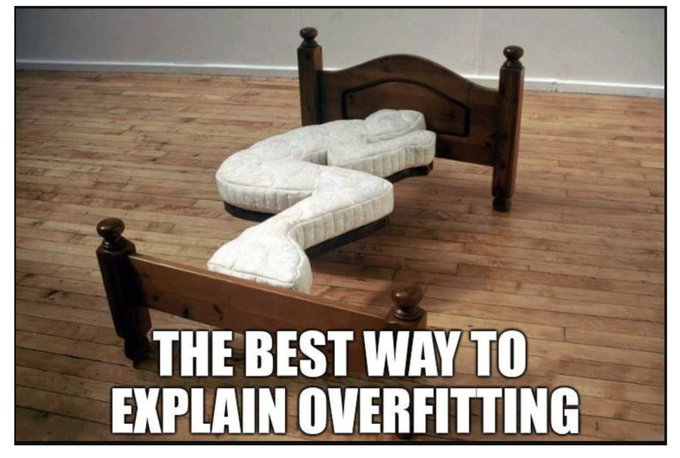



Cuando sucede esto, una de las cosas que se observa es que hay mucha diferencia entre rendimiento en la base de entrenamiento y la base de testeo. En este caso, no hay mucha diferencia entre entrenamiento y testeo, por lo que no pareciera haber overfitting.

Sin embargo, basarse sólo en la similitud entre entrenamiento y testeo omite el valor del accuracy. Es decir, si son similares las accuracy de entrenamiento y testeo, no significa que el algoritmo esté funcionando bien. Si el valor en el que coinciden es bajo, significa que el algoritmo clasifica "igual de mal" en ambos casos. Dado el caso, tendríamos el fenómeno que se llama "underfitting".

Por lo tanto, siempre hay que estar atentos a ambas cuestiones y hacer un análisis completo.

### Otras métricas

Notar que el accuracy evalúa las clasificaciones de todas las clases en conjunto. El problema con eso es que se pierde la noción de cuán bueno es el algoritmo para clasificar cada clase en particular. Si hay una clase de mayor cantidad de observaciones, puede opacar los problemas de clasificación de otra clase.

Por ejemplo, en el caso anterior teníamos **19778 observaciones** reales de personas con salarios menores o iguales a 50K, y **23083 predicciones** de personas con salarios menores o iguales a 50K. De estas clasificaciones, sólo 18856 son correctas.

Por lo tanto, podemos pensar en las siguientes magnitudes:

* Podemos evaluar cuán bueno es el algoritmo para detectar personas con salarios menores o iguales a 50K. Es decir, si una personas tiene un salario menor o igual a 50K, ¿cuán probable es que el algoritmo lo identifique correctamente?

  En este caso, sería comparar las predicciones correctas (18856) respecto de la cantidad real de personas que lo cumplen (19778): 18856/19778~0.9533. Esta métrica se denomina "sensibilidad" o "precisión".

* Podemos evaluar cuán confiables son las clasificaciones de personas con salarios menores o iguales a 50K. Es decir, si el algoritmo dice que una persona tiene un salario menor o igual a 50K, ¿cuán probable es que la clasificación sea correcta?

  En este caso, sería comparar las predicciones correctas (18856) respecto de la cantidad real de predicciones de esta clase (23083): 18856/23083~0.8168. Esta métrica se denomina "valor predictivo" o "recall".

Un comando que permite ver estas medidas para **todas** las clases se denomina "classification_report".

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report Train")
print(classification_report(y_train,LDA_train_pred))
print("Classification Report Test")
print(classification_report(y_test,LDA_test_pred))

Classification Report Train
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     19778
        >50K       0.69      0.33      0.44      6270

    accuracy                           0.80     26048
   macro avg       0.75      0.64      0.66     26048
weighted avg       0.79      0.80      0.77     26048

Classification Report Test
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4942
        >50K       0.69      0.34      0.45      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.67      6513
weighted avg       0.79      0.80      0.78      6513



Este análisis es importante porque evaluando todo el conjunto, se puede perder percepción de sesgos que pueda tener el algoritmo con alguna clase en particular. Por ejemplo, en este caso, la clasificación para personas con salario mayor a 50K funciona peor y el accuracy es mucho más alto que los valores de la precisión y el recall correspondiente.

## Quadratic Discriminant Analysis (QDA)

A continuación, aplicaremos el algoritmo QDA, pero sólo reemplazando algunas pocas variables e instrucciones, con el objetivo de establecer una estructura que "estandarice" la aplicación de algoritmos de machine learning con `sklearn`

## Cargar la base

In [ ]:
# Fuente de los datos
url="https://archive.ics.uci.edu/static/public/2/adult.zip"

In [ ]:
# Debe estar instalado e importado el paquete "wget"
# Adquirir los datos
wget.download(url, "archivo.zip")

In [ ]:
# Deben estar importados los paquetes "os" y "zipfile"
# En el caso de que sea un zip, extraer la base
os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [ ]:
# Debe estar importado el paquete pandas como "pd"
# Leer la base y guardarla en una variable
df=pd.read_csv("/content/adult.data",header=None)

### Inspeccionar y procesar la base

In [ ]:
# Renombrar columnas en caso de ser necesario
vars=["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
"relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
df.columns=vars

In [ ]:
# Inspección de los datos
df.head()

In [ ]:
# Inspección de las variables
df.info()

In [ ]:
# Análisis variables cualitativas
df["education"].value_counts()

In [ ]:
# Análisis variables cuantitativas
df["age"].describe()

### Covariables y Respuestas

In [ ]:
# Elijo las covariables (para LDA y QDA deben ser numéricas)
covs=["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
X=df[covs].copy()
# Respuestas
y=df["class"].copy()

### Entrenamiento y testeo

In [ ]:
# Debe estar importada la función "train_test_split" del paquete "sklearn.metrics"
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Inicialización del algoritmo y entrenamiento

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

### Predicciones

In [ ]:
QDA_train_pred=QDA.predict(X_train)
QDA_test_pred=QDA.predict(X_test)

### Evaluación con métricas

In [ ]:
# Debe estar importada la función "confusion_matrix" del paquete "sklearn.metrics"
print("Matriz de confusión Train")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_train,QDA_train_pred))

Matriz de confusión Train
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Test
[[18806   972]
 [ 4344  1926]]


In [ ]:
# Debe estar importada la función "accuracy_score" del paquete "sklearn.metrics"
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, QDA_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, QDA_test_pred))

Accuracy Entrenamiento
0.7959152334152334
Accuracy Testeo
0.7999385843697221


In [ ]:
# Debe estar importada la función "classification_report" del paquete "sklearn.metrics"
print("Classification Report Entrenamiento")
print(classification_report(y_train,QDA_train_pred))
print("Classification Report Testeo")
print(classification_report(y_test,QDA_test_pred))

Classification Report Entrenamiento
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     19778
        >50K       0.66      0.31      0.42      6270

    accuracy                           0.80     26048
   macro avg       0.74      0.63      0.65     26048
weighted avg       0.78      0.80      0.77     26048

Classification Report Testeo
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      4942
        >50K       0.68      0.32      0.43      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



## Estandarización de datos

Todos los criterios que usan los algoritmos para clasificar son numéricos, por lo que si una variable tiende a tener mayores valores, puede tener mayor influencia sobre los resultados. Por ejemplo, veamos las medias de las variables utilizadas:

In [ ]:
print("Medias:")
print(X.mean(axis=0))
print("Desvíos:")
print(X.std(axis=0))

Medias:
age                   38.581647
fnlwgt            189778.366512
education-num         10.080679
capital-gain        1077.648844
capital-loss          87.303830
hours-per-week        40.437456
dtype: float64
Desvíos:
age                   13.640433
fnlwgt            105549.977697
education-num          2.572720
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
dtype: float64


Vemos que efectivamente son muy diferentes los valores de cada variable. Por lo tanto, se puede aplicar un proceso llamado "estandarización", que a veces se denomina "scaling" en inglés. El proceso consiste de restar la media y dividir por el desvío correspondientes a cada variable.

En Python se utiliza el comando `StandardScaler`:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Habiendo aplicado la función, podemos ver la media y el desvio por variable:

In [ ]:
print(scaler.mean_)
print(scaler.scale_)

[3.85816468e+01 1.89778367e+05 1.00806793e+01 1.07764884e+03
 8.73038297e+01 4.04374559e+01]
[1.36402231e+01 1.05548357e+05 2.57268083e+00 7.38517868e+03
 4.02954031e+02 1.23472391e+01]


Para aplicar la transformación, se utiliza la función `transform`:

In [ ]:
X_sc=scaler.transform(X)
print("Medias Transformadas:")
print(X_sc.mean(axis=0))
print("Desvíos Transformados:")
print(X_sc.std(axis=0))

Medias Transformadas:
[-2.70591503e-17 -1.00162500e-16  1.47188684e-16  1.30931372e-17
  1.01690033e-16 -1.54935457e-17]
Desvíos Transformados:
[1. 1. 1. 1. 1. 1.]


Notar que todas las variables ahora tienen media cercana a cero (nunca es exacto) y el mismo desvío. Por lo tanto, podemos ver si aplicar esta transformación mejora el funcionamiento de los algoritmo.

In [ ]:
# Debe estar importada la función "train_test_split" del paquete "sklearn.metrics"
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y,test_size=0.2, random_state=42)

In [ ]:
# Debe estar importada la función "LinearDiscriminantAnalysis" del paquete "sklearn.discriminant_analysis"
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Inicializo el algoritmo
LDA_sc = LinearDiscriminantAnalysis()
LDA_sc.fit(X_sc_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Predicciones para la base de entrenamiento
LDA_sc_train_pred=LDA_sc.predict(X_sc_train)
# Predicciones para la base de testeo
LDA_sc_test_pred=LDA_sc.predict(X_sc_test)

In [ ]:
# Debe estar importada la función "confusion_matrix" del paquete "sklearn.metrics"
print("Matriz de confusión Entrenamiento")
print(confusion_matrix(y_train,LDA_train_pred))
print("Matriz de confusión Entrenamiento (Escalado)")
print(confusion_matrix(y_train,LDA_sc_train_pred))
print("Matriz de confusión Testeo")
print(confusion_matrix(y_test,LDA_test_pred))
print("Matriz de confusión Testeo (Escalado)")
print(confusion_matrix(y_test,LDA_sc_test_pred))

Matriz de confusión Entrenamiento
[[18856   922]
 [ 4227  2043]]
Matriz de confusión Entrenamiento (Escalado)
[[18856   922]
 [ 4227  2043]]
Matriz de confusión Testeo
[[4705  237]
 [1044  527]]
Matriz de confusión Testeo (Escalado)
[[4705  237]
 [1044  527]]


In [ ]:
# Debe estar importada la función "accuracy_score" del paquete "sklearn.metrics"
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, LDA_train_pred))
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, LDA_sc_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, LDA_test_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, LDA_sc_test_pred))

Accuracy Entrenamiento
0.8023264742014742
Accuracy Entrenamiento (Escalado)
0.8023264742014742
Accuracy Testeo
0.8033164440350069
Accuracy Testeo (Escalado)
0.8033164440350069


In [ ]:
# Debe estar importada la función "classification_report" del paquete "sklearn.metrics"
print("Classification Report Train")
print(classification_report(y_train,LDA_train_pred))
print("Classification Report Train (Escalado)")
print(classification_report(y_train,LDA_sc_train_pred))
print("Classification Report Test")
print(classification_report(y_test,LDA_test_pred))
print("Classification Report Test (Escalado)")
print(classification_report(y_test,LDA_sc_test_pred))

Classification Report Train
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     19778
        >50K       0.69      0.33      0.44      6270

    accuracy                           0.80     26048
   macro avg       0.75      0.64      0.66     26048
weighted avg       0.79      0.80      0.77     26048

Classification Report Train (Escalado)
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     19778
        >50K       0.69      0.33      0.44      6270

    accuracy                           0.80     26048
   macro avg       0.75      0.64      0.66     26048
weighted avg       0.79      0.80      0.77     26048

Classification Report Test
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4942
        >50K       0.69      0.34      0.45      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.64 

In [ ]:
# Debe estar importada la función "QuadraticDiscriminantAnalysis" del paquete "sklearn.discriminant_analysis"
QDA_sc = QuadraticDiscriminantAnalysis()
QDA_sc.fit(X_sc_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
QDA_sc_train_pred=QDA_sc.predict(X_sc_train)
QDA_sc_test_pred=QDA_sc.predict(X_sc_test)

In [ ]:
# Debe estar importada la función "confusion_matrix" del paquete "sklearn.metrics"
print("Matriz de confusión Train")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Train (Escalado)")
print(confusion_matrix(y_train,QDA_sc_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Test (Escalado)")
print(confusion_matrix(y_train,QDA_sc_train_pred))

Matriz de confusión Train
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Train (Escalado)
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Test
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Test (Escalado)
[[18806   972]
 [ 4344  1926]]


In [ ]:
# Debe estar importada la función "accuracy_score" del paquete "sklearn.metrics"
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, QDA_train_pred))
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, QDA_sc_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, QDA_test_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, QDA_sc_test_pred))

Accuracy Entrenamiento
0.7959152334152334
Accuracy Entrenamiento (Escalado)
0.7959152334152334
Accuracy Testeo
0.7999385843697221
Accuracy Testeo (Escalado)
0.7999385843697221


In [ ]:
# Debe estar importada la función "classification_report" del paquete "sklearn.metrics"
print("Classification Report Entrenamiento")
print(classification_report(y_train,QDA_train_pred))
print("Classification Report Entrenamiento (Escalado)")
print(classification_report(y_train,QDA_sc_train_pred))
print("Classification Report Testeo")
print(classification_report(y_test,QDA_test_pred))
print("Classification Report Testeo (Escalado)")
print(classification_report(y_test,QDA_sc_test_pred))

Classification Report Entrenamiento
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     19778
        >50K       0.66      0.31      0.42      6270

    accuracy                           0.80     26048
   macro avg       0.74      0.63      0.65     26048
weighted avg       0.78      0.80      0.77     26048

Classification Report Entrenamiento (Escalado)
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     19778
        >50K       0.66      0.31      0.42      6270

    accuracy                           0.80     26048
   macro avg       0.74      0.63      0.65     26048
weighted avg       0.78      0.80      0.77     26048

Classification Report Testeo
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      4942
        >50K       0.68      0.32      0.43      1571

    accuracy                           0.80      6513
   macro avg    

## Variables categóricas

Supongamos que queremos incluir una variable categórica al análisis. El algoritmo requería variables cuantitativas y por lo tanto, tira error:

In [ ]:
covs=["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week","sex"]
X=df[covs].copy()
y=df["class"].copy()

In [ ]:
# Debe estar importada la función "LinearDiscriminantAnalysis" del paquete "sklearn.discriminant_analysis"
LDA = LinearDiscriminantAnalysis()
LDA.fit(X,y)

ValueError: ignored

 Para transformar esta variable en numérica con algún criterio que no favorezca numéricamente a cualquier variable. Por lo tanto, se agregan lo que se llaman "variables dummies".

 Eso se hace en Python con el comando `get_dummies`:

In [ ]:
X_dum=pd.get_dummies(X,columns=["sex"],drop_first=True)

In [ ]:
print(X.head())
print(X_dum.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

       sex  
0     Male  
1     Male  
2     Male  
3     Male  
4   Female  
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40 

Como esta variable es binaria, será más importante que nunca estandarizar los datos porque sólo toma dos valores:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_dum)
X_dum_sc=scaler.transform(X_dum)

In [ ]:
X_dum_sc_train, X_dum_sc_test, y_train, y_test = train_test_split(X_dum_sc, y,test_size=0.2, random_state=42)

In [ ]:
# Inicializo el algoritmo
LDA_dum_sc = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA_dum_sc.fit(X_dum_sc_train,y_train)
# Predicciones para la base de entrenamiento
LDA_dum_sc_train_pred=LDA_dum_sc.predict(X_dum_sc_train)
# Predicciones para la base de testeo
LDA_dum_sc_test_pred=LDA_dum_sc.predict(X_dum_sc_test)

In [ ]:
# Debe estar importada la función "confusion_matrix" del paquete "sklearn.metrics"
print("Matriz de confusión Entrenamiento")
print(confusion_matrix(y_train,LDA_train_pred))
print("Matriz de confusión Entrenamiento (Dummies - Escalado)")
print(confusion_matrix(y_train,LDA_dum_sc_train_pred))
print("Matriz de confusión Testeo")
print(confusion_matrix(y_test,LDA_test_pred))
print("Matriz de confusión Testeo (Dummies - Escalado)")
print(confusion_matrix(y_test,LDA_dum_sc_test_pred))

Matriz de confusión Entrenamiento
[[18856   922]
 [ 4227  2043]]
Matriz de confusión Entrenamiento (Dummies - Escalado)
[[18788   990]
 [ 3936  2334]]
Matriz de confusión Testeo
[[4705  237]
 [1044  527]]
Matriz de confusión Testeo (Dummies - Escalado)
[[4702  240]
 [ 980  591]]


In [ ]:
# Debe estar importada la función "accuracy_score" del paquete "sklearn.metrics"
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, LDA_train_pred))
print("Accuracy Entrenamiento (Dummies - Escalado)")
print(accuracy_score(y_train, LDA_dum_sc_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, LDA_test_pred))
print("Accuracy Testeo (Dummies - Escalado)")
print(accuracy_score(y_test, LDA_dum_sc_test_pred))

Accuracy Entrenamiento
0.8023264742014742
Accuracy Entrenamiento (Dummies - Escalado)
0.8108875921375921
Accuracy Testeo
0.8033164440350069
Accuracy Testeo (Dummies - Escalado)
0.8126823276523876


In [ ]:
# Debe estar importada la función "classification_report" del paquete "sklearn.metrics"
print("Classification Report Train")
print(classification_report(y_train,LDA_train_pred))
print("Classification Report Train (Dummies - Escalado)")
print(classification_report(y_train,LDA_dum_sc_train_pred))
print("Classification Report Test")
print(classification_report(y_test,LDA_test_pred))
print("Classification Report Test (Dummies - Escalado)")
print(classification_report(y_test,LDA_dum_sc_test_pred))

Classification Report Train
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     19778
        >50K       0.69      0.33      0.44      6270

    accuracy                           0.80     26048
   macro avg       0.75      0.64      0.66     26048
weighted avg       0.79      0.80      0.77     26048

Classification Report Train (Dummies - Escalado)
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88     19778
        >50K       0.70      0.37      0.49      6270

    accuracy                           0.81     26048
   macro avg       0.76      0.66      0.69     26048
weighted avg       0.80      0.81      0.79     26048

Classification Report Test
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4942
        >50K       0.69      0.34      0.45      1571

    accuracy                           0.80      6513
   macro avg       0.75 

In [ ]:
# Debe estar importada la función "QuadraticDiscriminantAnalysis" del paquete "sklearn.discriminant_analysis"
QDA_dum_sc = QuadraticDiscriminantAnalysis()
QDA_dum_sc.fit(X_sc_train,y_train)
QDA_dum_sc_train_pred=QDA_dum_sc.predict(X_sc_train)
QDA_dum_sc_test_pred=QDA_dum_sc.predict(X_sc_test)

In [ ]:
# Debe estar importada la función "confusion_matrix" del paquete "sklearn.metrics"
print("Matriz de confusión Entrenamiento")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Entrenamiento (Dummies - Escalado)")
print(confusion_matrix(y_train,QDA_dum_sc_train_pred))
print("Matriz de confusión Testeo")
print(confusion_matrix(y_test,QDA_test_pred))
print("Matriz de confusión Testeo (Dummies - Escalado)")
print(confusion_matrix(y_test,QDA_dum_sc_test_pred))

Matriz de confusión Entrenamiento
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Entrenamiento (Dummies - Escalado)
[[18806   972]
 [ 4344  1926]]
Matriz de confusión Testeo
[[4709  233]
 [1070  501]]
Matriz de confusión Testeo (Dummies - Escalado)
[[4709  233]
 [1070  501]]


In [ ]:
# Debe estar importada la función "accuracy_score" del paquete "sklearn.metrics"
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, QDA_train_pred))
print("Accuracy Entrenamiento (Dummies - Escalado)")
print(accuracy_score(y_train, QDA_dum_sc_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, QDA_test_pred))
print("Accuracy Testeo (Dummies - Escalado)")
print(accuracy_score(y_test, QDA_dum_sc_test_pred))

Accuracy Entrenamiento
0.7959152334152334
Accuracy Entrenamiento (Dummies - Escalado)
0.7959152334152334
Accuracy Testeo
0.7999385843697221
Accuracy Testeo (Dummies - Escalado)
0.7999385843697221


In [ ]:
# Debe estar importada la función "classification_report" del paquete "sklearn.metrics"
print("Classification Report Train")
print(classification_report(y_train,QDA_train_pred))
print("Classification Report Train (Dummies - Escalado)")
print(classification_report(y_train,QDA_dum_sc_train_pred))
print("Classification Report Test")
print(classification_report(y_test,QDA_test_pred))
print("Classification Report Test (Dummies - Escalado)")
print(classification_report(y_test,QDA_dum_sc_test_pred))

# Ejercicios



## Base de UCI

Acceder a la página [Heart Disease Data](https://archive.ics.uci.edu/dataset/45/heart+disease).

### Carga de base

In [ ]:
!pip install wget
import wget

Buscar el link de descarga y rellenar el siguiente espacio con el link (debe estar entre comillas):

In [ ]:
# Buscar el enlace que permite descargar el archivo ".zip"
url=________________________________________________

In [ ]:
# Debe estar importado el paquete "wget"
wget.download(url, "archivo.zip")

In [ ]:
# Debe estar importados los paquete "os" y "zipfile"
os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

Examinar los archivos cargados seleccionando el ícono representando una carpeta que aparece a la izquierda. Una vez identificada la base, acceder a las opciones con los tres puntos que aparecen a su derecha seleccionar "copiar ruta de archivo" o "copy path". Pegar con "Ctrl+v" esa ruta en la variable "path"


In [ ]:
# Debe estar importado el paquete "pandas"
path=____________________
df=pd.read_csv(path)

### Inspección y procesamiento de base

Inspeccionar la base con los comandos `.head`,`.info`,`.value_counts` y `.describe`.

In [ ]:
#Head
___________________

In [ ]:
# Info
___________________

In [ ]:
# Value_counts
___________________

In [ ]:
# Describe
___________________

### Selección de variables de respuesta y covariables

Seleccionar las variables numéricas de la base como covariables y la última variable como respuesta:

In [ ]:
# Elijo las covariables (para LDA y QDA deben ser numéricas)
covs=[_______________________________]
X=df[covs].copy()
# Respuestas
y=df[______].copy()

### Partición en entrenamiento y testeo

In [ ]:
# Debe estar importada la función "train_test_split" del paquete "sklearn.metrics"
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### LDA

#### Inicialización

In [ ]:
# Inicializo el algoritmo
LDA = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA.fit(X_train,y_train)

#### Predicciones

In [ ]:
# Predicciones para la base de entrenamiento
LDA_train_pred=LDA.predict(X_train)
# Predicciones para la base de testeo
LDA_test_pred=LDA.predict(X_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Train")
print(confusion_matrix(y_train,LDA_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_test,LDA_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, LDA_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, LDA_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train")
print(classification_report(y_train,LDA_train_pred))
print("Classification Report Test")
print(classification_report(y_test,LDA_test_pred))

### QDA

#### Inicialización

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)

#### Predicciones

In [ ]:
QDA_train_pred=QDA.predict(X_train)
QDA_test_pred=QDA.predict(X_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Train")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_train,QDA_train_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, QDA_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, QDA_test_pred))

###### Classification Report

In [ ]:
print("Classification Report Entrenamiento")
print(classification_report(y_train,QDA_train_pred))
print("Classification Report Testeo")
print(classification_report(y_test,QDA_test_pred))

### Datos Estandarizados

Repetir las consignas para los datos estandarizados

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_sc=scaler.transform(X)

#### Partición en Entrenamiento y Testeo

In [ ]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y,test_size=0.2, random_state=42)

### LDA

#### Inicialización

In [ ]:
# Inicializo el algoritmo
LDA_sc = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA_sc.fit(X_sc_train,y_train)

#### Predicciones

In [ ]:
# Predicciones para la base de entrenamiento
LDA_sc_train_pred=LDA_sc.predict(X_sc_train)
# Predicciones para la base de testeo
LDA_sc_test_pred=LDA_sc.predict(X_sc_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Entrenamiento (Escalado)")
print(confusion_matrix(y_train,LDA_sc_train_pred))
print("Matriz de confusión Testeo (Escalado)")
print(confusion_matrix(y_test,LDA_sc_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, LDA_sc_train_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, LDA_sc_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train (Escalado)")
print(classification_report(y_train,LDA_sc_train_pred))
print("Classification Report Test (Escalado)")
print(classification_report(y_test,LDA_sc_test_pred))

### QDA

#### Inicialización

In [ ]:
QDA_sc = QuadraticDiscriminantAnalysis()
QDA_sc.fit(X_sc_train,y_train)

#### Predicciones

In [ ]:
QDA_sc_train_pred=QDA_sc.predict(X_sc_train)
QDA_sc_test_pred=QDA_sc.predict(X_sc_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Entrenamiento (Escalado)")
print(confusion_matrix(y_train,QDA_sc_train_pred))
print("Matriz de confusión Testeo (Escalado)")
print(confusion_matrix(y_test,QDA_sc_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, QDA_sc_train_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, QDA_sc_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train (Escalado)")
print(classification_report(y_train,QDA_sc_train_pred))
print("Classification Report Test (Escalado)")
print(classification_report(y_test,QDA_sc_test_pred))

## Base de Kaggle

Acceder al siguiente link [Salary Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data) para acceder a la base de salarios.

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# En el link aportado, copiar y pegar todo lo que le sigue a "/datasets/"
!kaggle datasets download -d ___________

In [ ]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [ ]:
# Examinar los archivos cargados seleccionando el ícono representando una carpeta que aparece a la izquierda
# Una vez identificada la base, acceder a las opciones con los tres puntos que aparecen a su derecha
# seleccionar "copiar ruta de archivo" o "copy path". Pegar con "Ctrl+v" esa ruta en la variable "path"
path=____________
df=pd.read_csv(path)

Inspeccionar la base con los comandos `.head`,`.info`,`.value_counts` y `.describe`.

In [ ]:
#Head
___________________

In [ ]:
# Info
___________________

In [ ]:
# Value_counts
___________________

In [ ]:
# Describe
___________________

### Procesamiento

Notar que la variable "Education_Level" separa valores que en realidad, corresponden a la misma categoría.

In [ ]:
df["Education Level"].value_counts()

Para unificar estos valores, la recatogrizamos creando una nueva variable denominada `Education New`:

In [ ]:
df["Education New"]=df["Education Level"].copy()

In [ ]:
df["Education New"].loc[df["Education Level"].str.contains("Bach")==True]="Bachelor's"
df["Education New"].loc[df["Education Level"].str.contains("Mast")==True]="Master's"
df["Education New"].loc[df["Education Level"].str.contains("hD")==True]="PhD"

Verificamos que con estos cambios, las categorías quedaron unificadas

In [ ]:
df["Education New"].value_counts()

### Selección de variables de respuesta y covariables

Seleccionar las variables numéricas de la base como covariables y la variable `Gender` como respuesta:

In [ ]:
# Elijo las covariables (para LDA y QDA deben ser numéricas)
covs=[_______________________________]
X=df[covs].copy()
# Respuestas
y=df[______].copy()

### Partición en entrenamiento y testeo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### LDA

#### Inicialización

In [ ]:
# Inicializo el algoritmo
LDA = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA.fit(X_train,y_train)

#### Predicciones

In [ ]:
# Predicciones para la base de entrenamiento
LDA_train_pred=LDA.predict(X_train)
# Predicciones para la base de testeo
LDA_test_pred=LDA.predict(X_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Train")
print(confusion_matrix(y_train,LDA_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_test,LDA_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, LDA_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, LDA_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train")
print(classification_report(y_train,LDA_train_pred))
print("Classification Report Test")
print(classification_report(y_test,LDA_test_pred))

### QDA

#### Inicialización

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)

#### Predicciones

In [ ]:
QDA_train_pred=QDA.predict(X_train)
QDA_test_pred=QDA.predict(X_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Train")
print(confusion_matrix(y_train,QDA_train_pred))
print("Matriz de confusión Test")
print(confusion_matrix(y_train,QDA_train_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento")
print(accuracy_score(y_train, QDA_train_pred))
print("Accuracy Testeo")
print(accuracy_score(y_test, QDA_test_pred))

###### Classification Report

In [ ]:
print("Classification Report Entrenamiento")
print(classification_report(y_train,QDA_train_pred))
print("Classification Report Testeo")
print(classification_report(y_test,QDA_test_pred))

### Variables categóricas

Generar variables dummies para la variable "Education New".

In [ ]:
df_dum=pd.get_dummies(df,columns=[_______],drop_first=True)

### Selección de variables de respuesta y covariables

Seleccionar las variables numéricas de la base como covariables y la última variable como respuesta:

In [ ]:
# Elijo las covariables (para LDA y QDA deben ser numéricas)
covs=[_______________________________]
X=df[covs].copy()
# Respuestas
y=df[______].copy()
# Estandarizar las covariables
scaler = StandardScaler()
scaler.fit(X)
X_sc=scaler.transform(X)

#### Partición en Entrenamiento y Testeo

In [ ]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y,test_size=0.2, random_state=42)

### LDA

#### Inicialización

In [ ]:
# Inicializo el algoritmo
LDA_sc = LinearDiscriminantAnalysis()
# Se pasa como argumento los datos de entrenamiento y las respuestas correspondientes
LDA_sc.fit(X_sc_train,y_train)

#### Predicciones

In [ ]:
# Predicciones para la base de entrenamiento
LDA_sc_train_pred=LDA_sc.predict(X_sc_train)
# Predicciones para la base de testeo
LDA_sc_test_pred=LDA_sc.predict(X_sc_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Entrenamiento (Escalado)")
print(confusion_matrix(y_train,LDA_sc_train_pred))
print("Matriz de confusión Testeo (Escalado)")
print(confusion_matrix(y_test,LDA_sc_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, LDA_sc_train_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, LDA_sc_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train (Escalado)")
print(classification_report(y_train,LDA_sc_train_pred))
print("Classification Report Test (Escalado)")
print(classification_report(y_test,LDA_sc_test_pred))

### QDA

#### Inicialización

In [ ]:
QDA_sc = QuadraticDiscriminantAnalysis()
QDA_sc.fit(X_sc_train,y_train)

#### Predicciones

In [ ]:
QDA_sc_train_pred=QDA_sc.predict(X_sc_train)
QDA_sc_test_pred=QDA_sc.predict(X_sc_test)

#### Evaluación


##### Matriz de confusión

In [ ]:
print("Matriz de confusión Entrenamiento (Escalado)")
print(confusion_matrix(y_train,QDA_sc_train_pred))
print("Matriz de confusión Testeo (Escalado)")
print(confusion_matrix(y_test,QDA_sc_test_pred))

##### Accuracy

In [ ]:
print("Accuracy Entrenamiento (Escalado)")
print(accuracy_score(y_train, QDA_sc_train_pred))
print("Accuracy Testeo (Escalado)")
print(accuracy_score(y_test, QDA_sc_test_pred))

##### Classification Report

In [ ]:
print("Classification Report Train (Escalado)")
print(classification_report(y_train,QDA_sc_train_pred))
print("Classification Report Test (Escalado)")
print(classification_report(y_test,QDA_sc_test_pred))